Modelo Arima
Un modelo Arima, significa promedio movil(MA) integrado(I) autorregresivo(AR), es un modelo estadístico que utiliza datos de series de tiempo para comprender mejor el conjunto de datos o para predecir tendencias futuras. Es una forma de análisis de regresión que mide la fuerza de una variable dependiente en relación a otra variable cambiante

La modelación ARIMA, puede pronosticar una serie de tiempo utilizando los valores pasados de la serie.

El primer paso para construir un modelo ARIMA es hacer que la serie temporal sea estacionaria, El enfoque bastante común es diferenciarlo. Es decir, restamos el valor anterior del valor actual. A veces, dependiendo de la complejidad de la serie, es posible que se necesite más de una diferenciación.


Un modelo ARIMA se caracteriza por 3 términos: p, d, q

dónde,

p: es el orden del término AR

q: es el orden del término MA

:d es el número de diferenciaciones necesarias para que la serie de tiempo sea estacionaria

Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en SARIMA, abreviatura de "Seasonal ARIMA".



In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



import statsmodels.api as sm
import statsmodels.tsa.api as smt

from timeit import default_timer as timer

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder


In [2]:
csv_file = 'CSVS STATS/todas_stats.csv'  

# Leer el archivo CSV en un DataFrame
estadisticas = pd.read_csv(csv_file)

# Pasar a data frame
df = pd.DataFrame(estadisticas)

df['partidos_ult10_temp'] = df['victorias_ult10_temp'] + df['empates_ult10_temp'] + df['derrotas_ult10_temp']

df['goles_marcados_ult10_temp'] = df['Goles Marcados Local_ult10_temp'] + df['Goles Marcados Visitante_ult10_temp']

df.head()

,equipo,victorias_esta_temp,empates_esta_temp,derrotas_esta_temp,porcentaje_victorias_esta_temp,porcentaje_empates_esta_temp,porcentaje_derrotas_esta_temp,victorias_ult10_temp,empates_ult10_temp,derrotas_ult10_temp,...,Goles Recibidos Local_ult10_temp,Goles Recibidos Visitante_ult10_temp,Golesxpartido Local_ult10_temp,Golesxpartido Visitante_ult10_temp,Golesxpartido Recibidos Local_ult10_temp,Golesxpartido Recibidos Visitante_ult10_temp,titulos_UCL_ganados,titulos_UCL_ult10_temp,partidos_ult10_temp,goles_marcados_ult10_temp
0,Copenhague,2.0,2.0,2.0,33.3,33.3,33.3,2.0,2.0,2.0,...,5.0,3.0,2.0,0.7,1.7,1.0,0,0,6.0,8.0
1,Leipzig,4.0,0.0,2.0,66.7,0.0,33.3,22.0,5.0,19.0,...,37.0,48.0,1.8,1.7,1.5,2.2,0,0,46.0,81.0
2,PSG,2.0,2.0,2.0,33.3,33.3,33.3,30.0,8.0,16.0,...,20.0,40.0,2.4,2.1,0.7,1.5,0,0,54.0,121.0
3,Lazio,3.0,1.0,2.0,50.0,16.7,33.3,5.0,5.0,4.0,...,9.0,11.0,1.9,1.0,1.3,1.6,0,0,14.0,20.0
4,PSV,2.0,3.0,1.0,33.3,50.0,16.7,2.0,3.0,1.0,...,3.0,7.0,1.3,1.3,1.0,2.3,0,0,6.0,8.0


Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA?

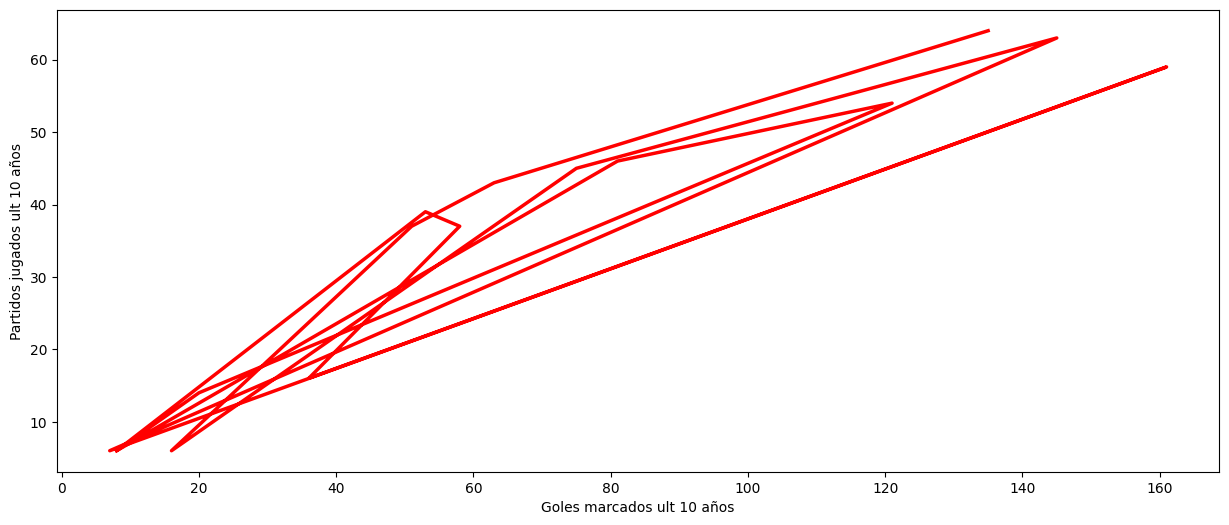

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(df['goles_marcados_ult10_temp'], df['partidos_ult10_temp'], lw=2.5, color="r")
plt.ylabel('Partidos jugados ult 10 años')
plt.xlabel('Goles marcados ult 10 años')
plt.show()

Hacemos la prueba de Dickey-Fuller para probar estacionalidad


In [22]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series1 ,  column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series1, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")
        
Augmented_Dickey_Fuller_Test_func(df['goles_marcados_ult10_temp'],"Close")


Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic                        -4.863350
p-value                                0.000041
No Lags Used                           0.000000
Número de observaciones utilizadas    15.000000
Critical Value (1%)                   -3.964443
Critical Value (5%)                   -3.084908
Critical Value (10%)                  -2.681814
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


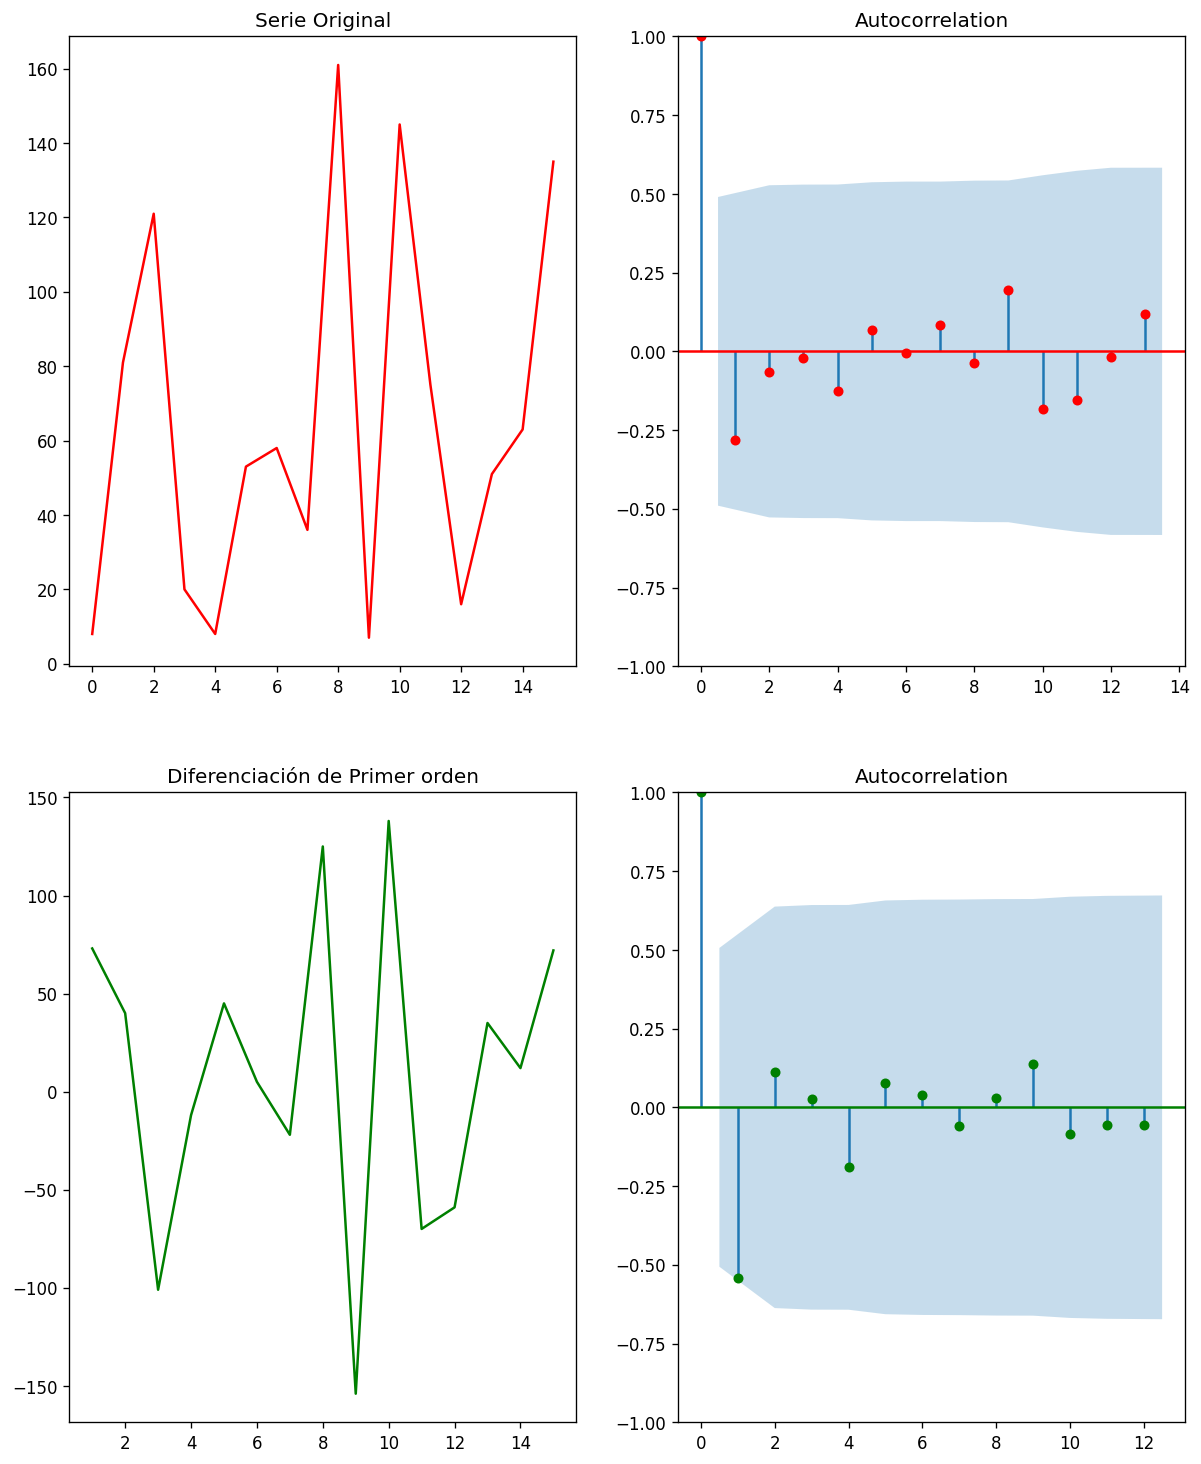

In [27]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(df['goles_marcados_ult10_temp'],color="r"); axes[0, 0].set_title('Serie Original')
plot_acf(df['goles_marcados_ult10_temp'], ax=axes[0, 1], color="r")

# Primera diferenciación 
axes[1, 0].plot(df['goles_marcados_ult10_temp'].diff(), color="g"); axes[1, 0].set_title("Diferenciación de Primer orden")
plot_acf(df['goles_marcados_ult10_temp'].diff().dropna(), ax=axes[1, 1],color="g")

plt.show();

Las 2 ultimas graficas no son necesarias ya que se puede observar en la primera correlacion que es estacionaria, en este caso podria ser de 2º orden

Cómo encontrar el orden del término AR (p)

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


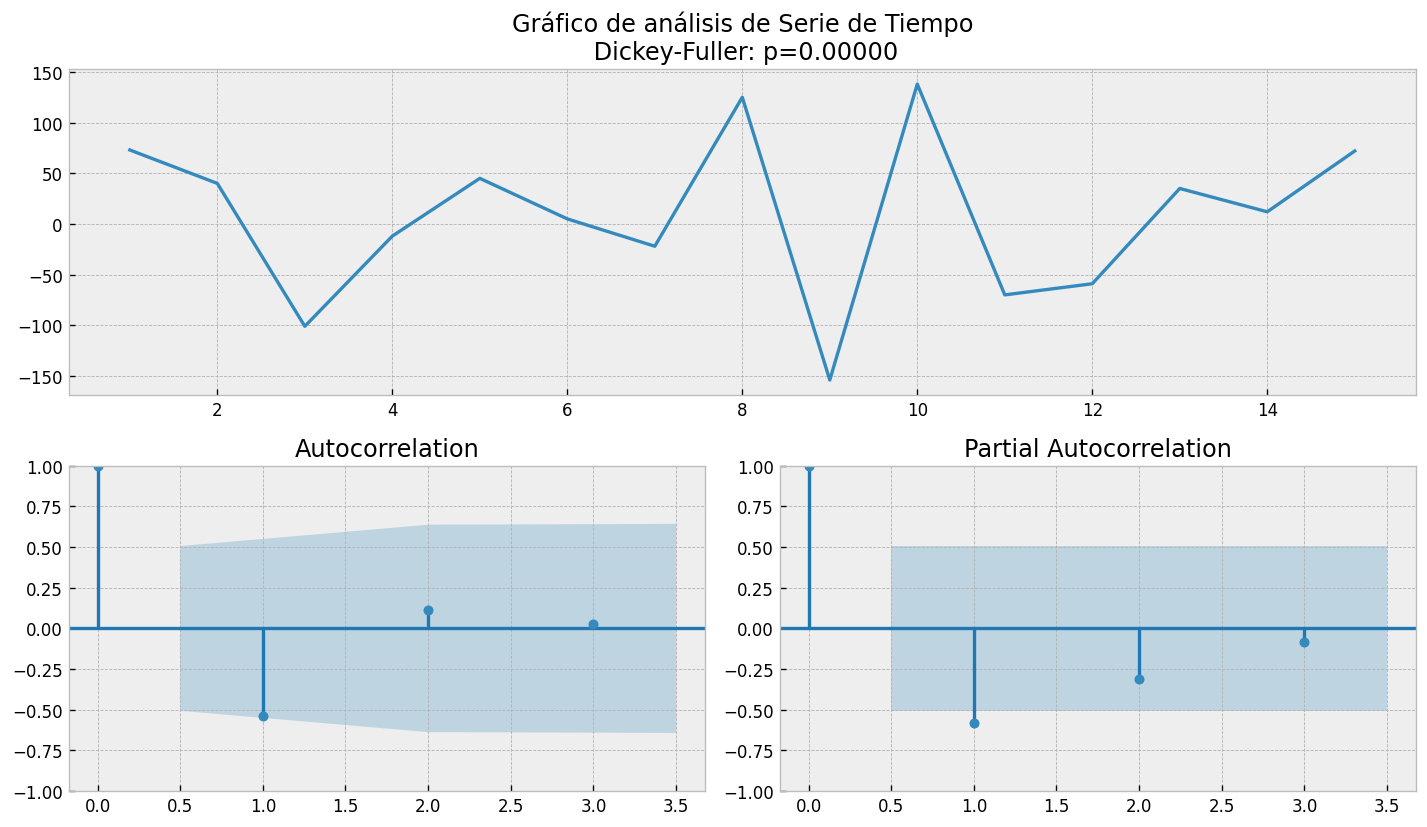

In [29]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): 
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    if lags is None:
        lags = min(10, int(len(y)/5))  # Ajusta el número máximo de lags aquí
    
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de análisis de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

# Utiliza la función tsplot con la cantidad predeterminada de lags
tsplot(df['goles_marcados_ult10_temp'].diff().dropna())

MODELO ARIMA

In [31]:
# 1,1,2 ARIMA Model
model1 = ARIMA(df["goles_marcados_ult10_temp"], order=(1,1,1))
model_fit1 = model1.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     goles_marcados_ult10_temp   No. Observations:                   16
Model:                        ARIMA(1, 1, 1)   Log Likelihood                 -81.271
Date:                       Sun, 25 Feb 2024   AIC                            168.542
Time:                               00:12:42   BIC                            170.666
Sample:                                    0   HQIC                           168.519
                                        - 16                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2749      0.357     -0.771      0.441      -0.974       0.424
ma.L1         -0.9914      5.278     -0.188      0.851     -11.337       9.354
sigma2      2406.0984   1.22e+04      0.197      0.844   -2.15e+04    2.64e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.85   Prob(JB):                         0.59
Heteroskedasticity (H):               0.80   Skew:                             0.33
Prob(H) (two-sided):                  0.81   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

La tabla 2ª es la tabla de coeficientes donde los valores bajo 'coef' son los pesos de los términos respectivos.

                                   SARIMAX Results                                   
Dep. Variable:     goles_marcados_ult10_temp   No. Observations:                   16
Model:                        ARIMA(1, 1, 1)   Log Likelihood                 -81.271
Date:                       Sun, 25 Feb 2024   AIC                            168.542
Time:                               00:30:51   BIC                            170.666
Sample:                                    0   HQIC                           168.519
                                        - 16                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2749      0.357     -0.771      0.441      -0.974       0.424
ma.L1         -0.9914      5.278     -0.188      0.851     -11.337       9.

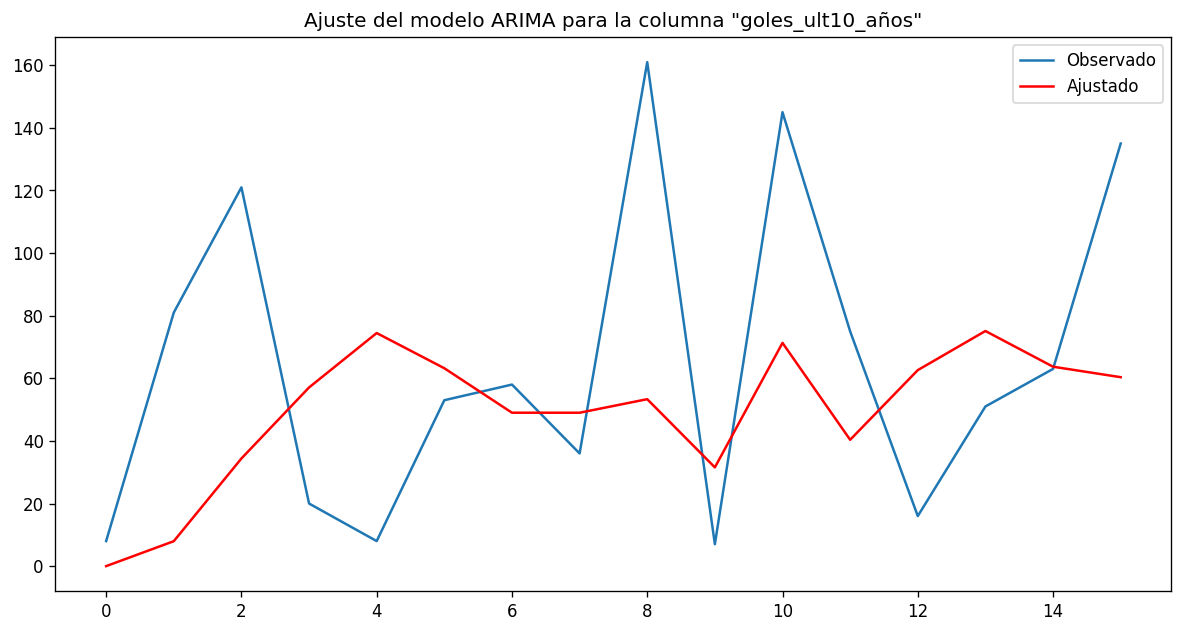

In [60]:
columna = 'goles_marcados_ult10_temp'
data = df[columna]

# Definir el modelo ARIMA
order = (1, 1, 1)
model = ARIMA(data, order=order)

# Ajustar el modelo
fitted_model = model.fit()

# Obtener resumen del modelo
print(fitted_model.summary())

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observado')
plt.plot(fitted_model.fittedvalues, color='red', label='Ajustado')
plt.title('Ajuste del modelo ARIMA para la columna "goles_ult10_años"')
plt.legend()
plt.show()

Recursive forecasting en el contexto de Random Forest y Gradient Boosting Regression se refiere a realizar predicciones de series temporales mediante la aplicación iterativa del modelo sobre los resultados previos de las predicciones.

En términos simples, en lugar de predecir todos los valores futuros de la serie temporal de una vez, se realiza una predicción inicial para el siguiente período de tiempo y luego se utiliza esa predicción para predecir el siguiente periodo. Este proceso se repite iterativamente hasta alcanzar el horizonte de tiempo deseado.

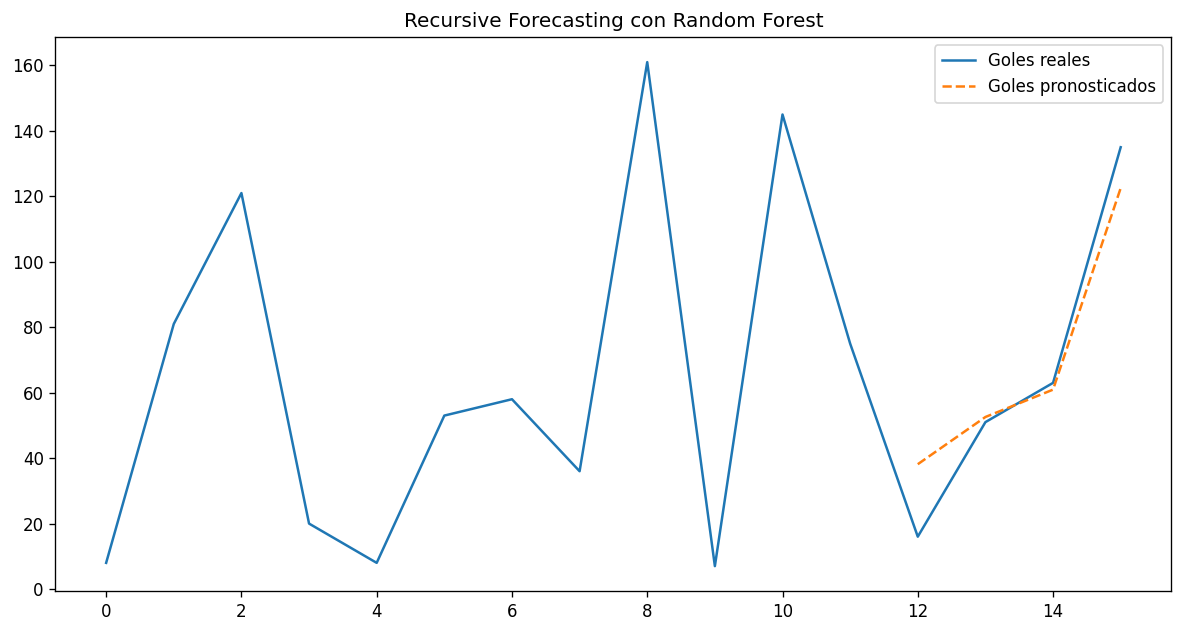

In [84]:

# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_teams = encoder.fit_transform(df[['equipo']])
df_encoded = pd.concat([df, pd.DataFrame(encoded_teams, columns=encoder.get_feature_names_out(['equipo']))], axis=1)
df_encoded = df_encoded.drop('equipo', axis=1)

# Dividir el DataFrame en entrenamiento y prueba
train_size = int(len(df_encoded) * 0.8)
train, test = df_encoded.iloc[:train_size], df_encoded.iloc[train_size:]

# Definir las características (X) y las etiquetas (y) para 'goles_ult10_temp'
X_goles_train, y_goles_train = train.drop('goles_marcados_ult10_temp', axis=1), train['goles_marcados_ult10_temp']
X_goles_test, y_goles_test = test.drop('goles_marcados_ult10_temp', axis=1), test['goles_marcados_ult10_temp']

# Inicializar el modelo Random Forest para 'goles_ult10_temp'
model_goles = RandomForestRegressor(n_estimators=100, random_state=42)
model_goles.fit(X_goles_train, y_goles_train)

# Realizar Recursive Forecasting para 'goles_ult10_temp'
goles_forecast = model_goles.predict(X_goles_test)
df_encoded.loc[train_size:, 'goles_ult10_temp_forecast'] = goles_forecast

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df_encoded.index, df_encoded['goles_marcados_ult10_temp'], label='Goles reales')
plt.plot(df_encoded.index, df_encoded['goles_ult10_temp_forecast'], label='Goles pronosticados', linestyle='dashed')
plt.legend()
plt.title('Recursive Forecasting con Random Forest')
plt.show()

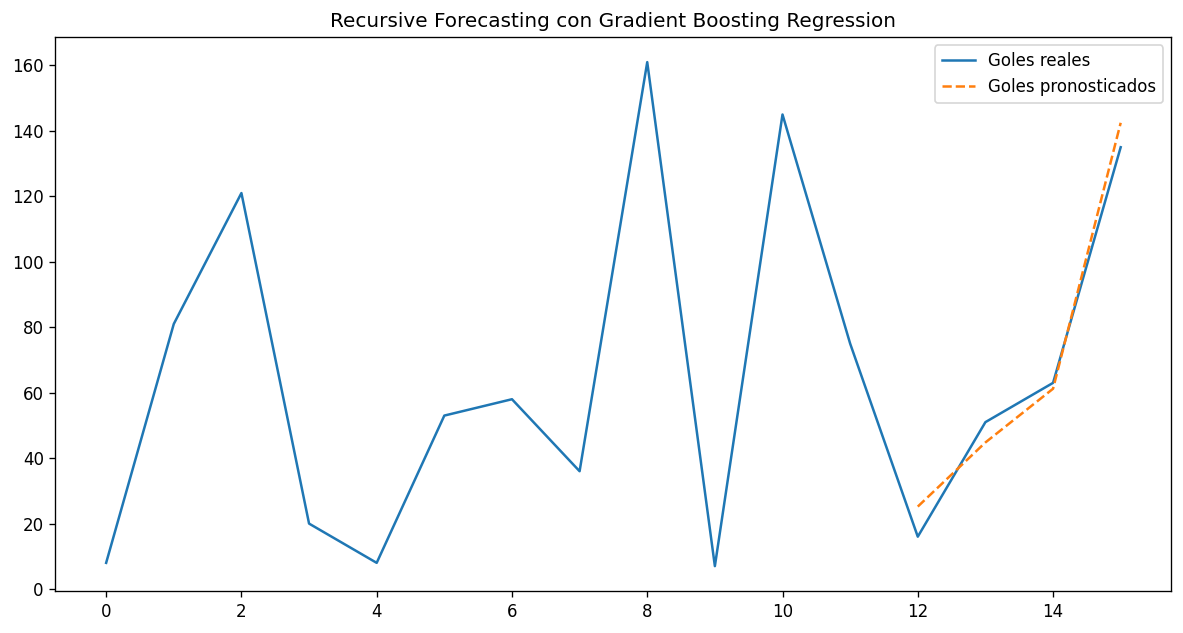

In [87]:
# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_teams = encoder.fit_transform(df[['equipo']])
df_encoded = pd.concat([df, pd.DataFrame(encoded_teams, columns=encoder.get_feature_names_out(['equipo']))], axis=1)
df_encoded = df_encoded.drop('equipo', axis=1)

# Dividir el DataFrame en entrenamiento y prueba
train_size = int(len(df_encoded) * 0.8)
train, test = df_encoded.iloc[:train_size], df_encoded.iloc[train_size:]

# Definir las características (X) y las etiquetas (y) para 'goles_ult10_temp'
X_goles_train, y_goles_train = train.drop('goles_marcados_ult10_temp', axis=1), train['goles_marcados_ult10_temp']
X_goles_test, y_goles_test = test.drop('goles_marcados_ult10_temp', axis=1), test['goles_marcados_ult10_temp']

# Inicializar el modelo Gradient Boosting Regression para 'goles_ult10_temp'
model_goles = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_goles.fit(X_goles_train, y_goles_train)

# Realizar Recursive Forecasting para 'goles_ult10_temp'
goles_forecast = model_goles.predict(X_goles_test)
df_encoded.loc[train_size:, 'goles_ult10_temp_forecast'] = goles_forecast

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df_encoded.index, df_encoded['goles_marcados_ult10_temp'], label='Goles reales')
plt.plot(df_encoded.index, df_encoded['goles_ult10_temp_forecast'], label='Goles pronosticados', linestyle='dashed')
plt.legend()
plt.title('Recursive Forecasting con Gradient Boosting Regression')
plt.show()

La prediccion no es exactamente igual en los 2 modelos, ambos son modelos del tipo Esemble modeling, implica combinar las predicciones de varios modelos para mejorar el rendimiento general. En lugar de depender de un solo modelo, se utilizan múltiples modelos y se combinan sus resultados para obtener una predicción más robusta y precisa. Cada modelo individual puede tener fortalezas y debilidades diferentes, y el ensemble busca aprovechar esas fortalezas mientras mitiga las debilidades.

Ahora vamos a usar Multivariate Forecasting, se refiere a la predicción de múltiples variables simultáneamente. En lugar de predecir una única variable, como en la mayoría de los modelos de series temporales univariadas, los modelos multivariados abordan la predicción de dos o más variables interrelacionadas. Esto puede ser útil cuando las variables están correlacionadas y la información de una variable puede mejorar la precisión de las predicciones de otra.



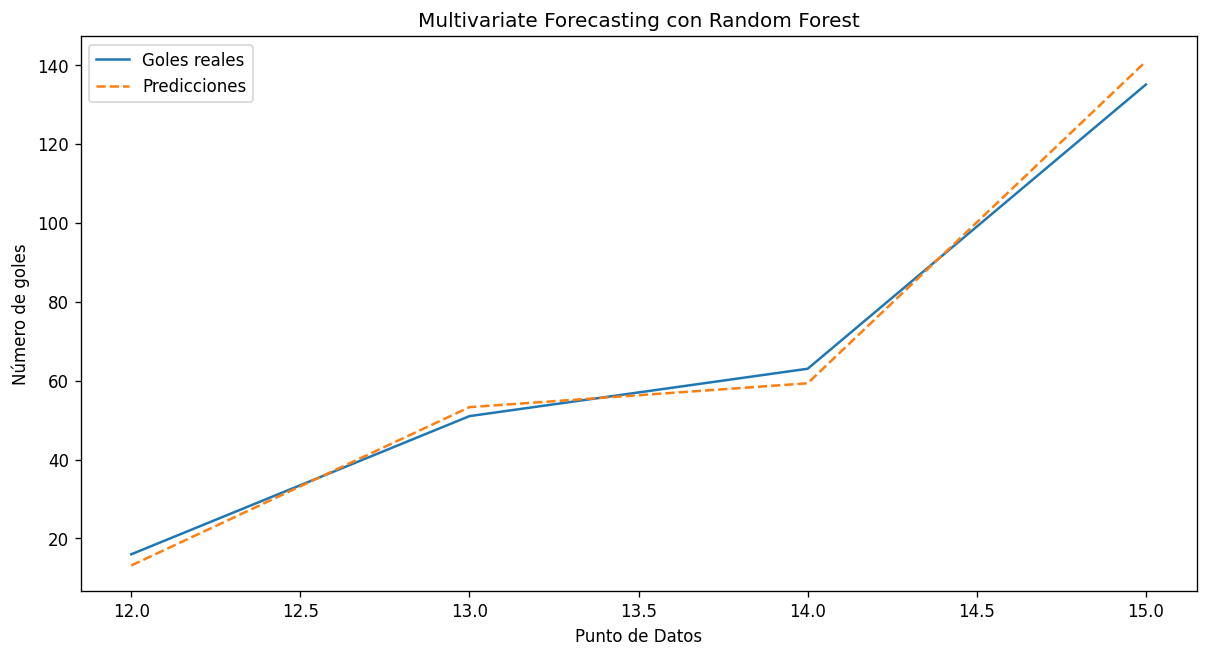

In [93]:
# Dividir el DataFrame en entrenamiento y prueba
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Definir las características (X) y las etiquetas (y) para el modelo
features = ['goles_marcados_ult10_temp', 'victorias_ult10_temp']
X_train, y_train = train[features], train['goles_marcados_ult10_temp']
X_test, y_test = test[features], test['goles_marcados_ult10_temp']

# Inicializar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones para el conjunto de prueba
predictions = model.predict(X_test)

# Crear una copia de la sección de prueba antes de asignar las predicciones
test_copy = test.copy()

# Agregar las predicciones al DataFrame de prueba
test_copy['predictions'] = predictions

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test_copy.index, test_copy['goles_marcados_ult10_temp'], label='Goles reales')
plt.plot(test_copy.index, test_copy['predictions'], label='Predicciones', linestyle='dashed')
plt.legend()
plt.xlabel('Punto de Datos')
plt.ylabel('Número de goles')
plt.title('Multivariate Forecasting con Random Forest')
plt.show()

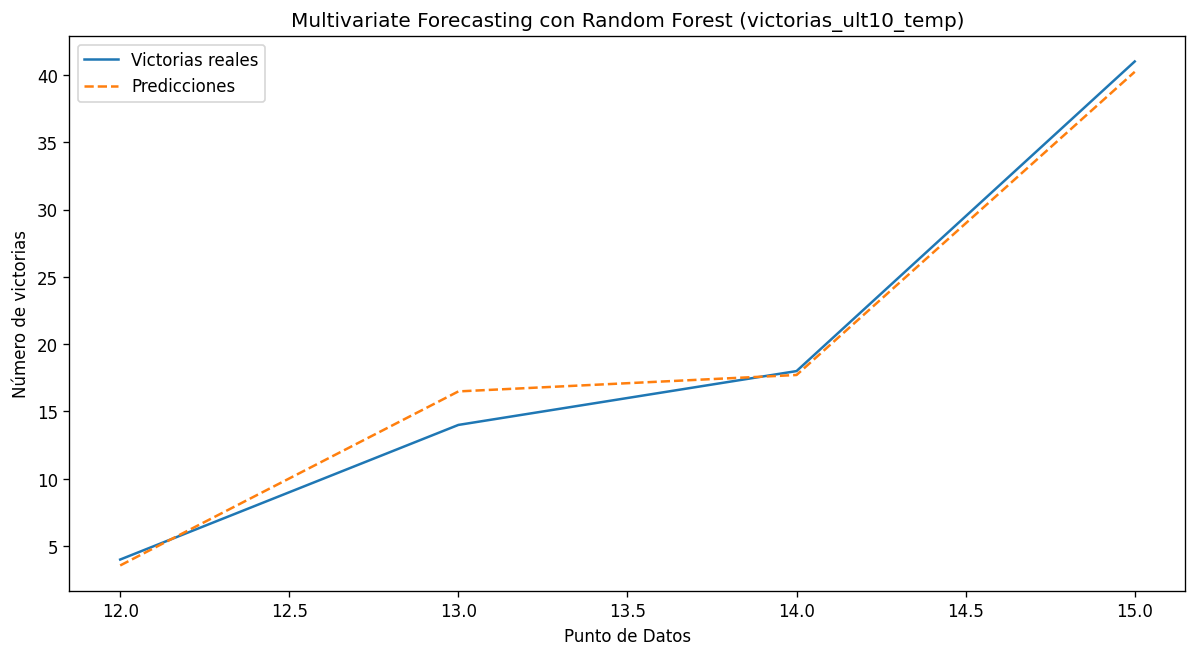

In [94]:
# Definir las características (X) y las etiquetas (y) para el modelo
features = ['goles_marcados_ult10_temp', 'victorias_ult10_temp']
X_train, y_train = train[features], train['victorias_ult10_temp']
X_test, y_test = test[features], test['victorias_ult10_temp']

# Inicializar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones para el conjunto de prueba
predictions = model.predict(X_test)

# Crear una copia de la sección de prueba antes de asignar las predicciones
test_copy = test.copy()

# Agregar las predicciones al DataFrame de prueba
test_copy['predictions'] = predictions

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test_copy.index, test_copy['victorias_ult10_temp'], label='Victorias reales')
plt.plot(test_copy.index, test_copy['predictions'], label='Predicciones', linestyle='dashed')
plt.legend()
plt.xlabel('Punto de Datos')  
plt.ylabel('Número de victorias')
plt.title('Multivariate Forecasting con Random Forest (victorias_ult10_temp)')
plt.show()